This demo runs our stochastic models and illustrates how the parametrisation influences the output

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import data_preprocessing.stochastic_systems_models as ssm
import data_preprocessing.plotting_functions as ABC_plot

SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'Arial'

We will simulate the pulse phase three population model with various parameterisations. We start with a parameterisation of high posterior density which gives a good fit.

Order of parameters: $\beta_0, \beta_1, p, \mu_d, \mu_b, \mu_r, c$

In [2]:
params = np.load("./data_preprocessing/simulated_ABC_data/three_population_model/three_population_pulse_accepted_params.npy")[1]
print(params)
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_three_population_pulse(params, verbose = False, full_trajectory = False, mode = "full")

[2.59032277e+02 1.15523561e+00 8.23801037e-02 6.10760106e-02
 1.90407399e-03 2.23420503e-01 3.89596550e-04]


When full_trajectory is set to False, as above, the function outputs the nucleoid number and mtEdU number for each cell only at the observed time points: 1, 3, 7, 24hr. This allows a direct comparison with the observed cells both stochastically:

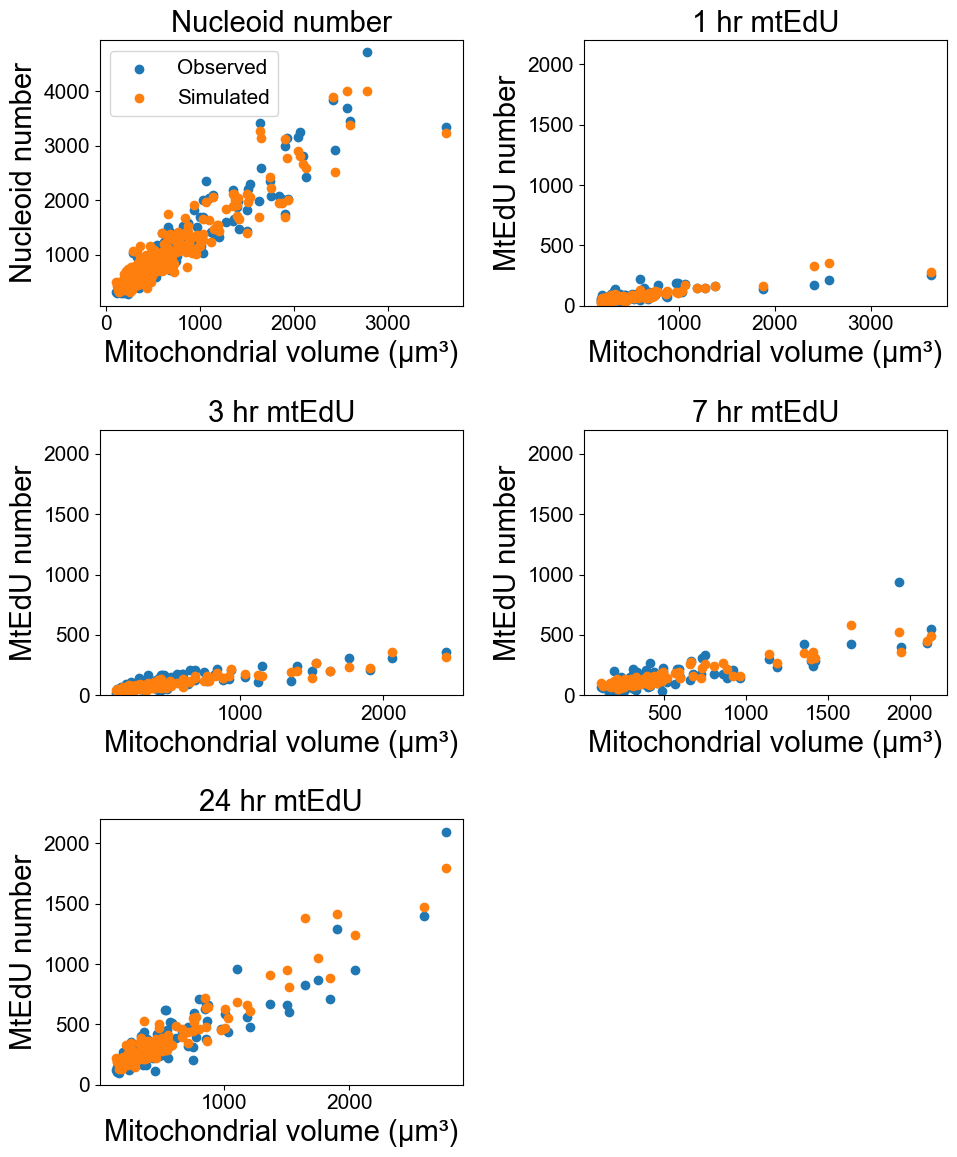

In [3]:
ABC_plot.plot_stochastic_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

and in terms of their mean trajectories:

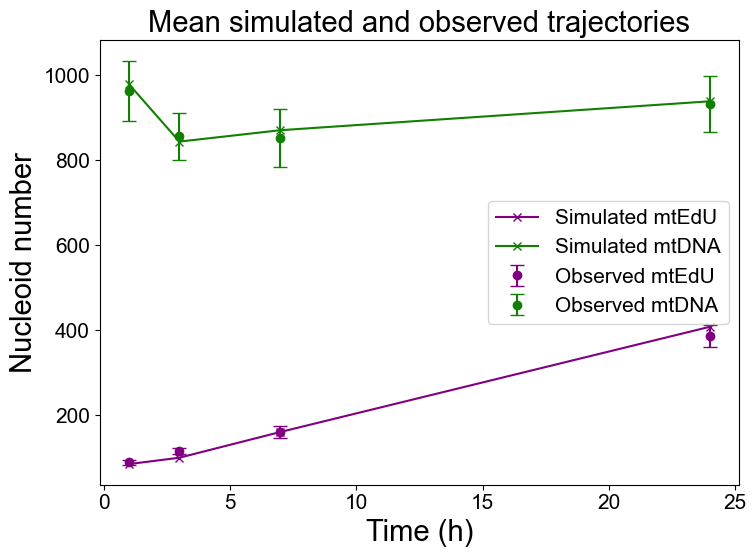

In [4]:
ABC_plot.plot_mean_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

We can also print the mean, across all 24 hour simulated cells, of mtEdU which were singly tagged, getting ~0.27. Recall that we observed ~0.33 from our Gaussian mixture modelling.

In [5]:
print(average_peak1_proportion)

0.33233430587577334


We now demonstrate the effects of altering the parameterisations. Firstly, if we make the birth and death rates, and replication termination rates $\mu_b, \mu_d, \mu_r$ larger (effectively increasing the turnover rate), we see an accumulation of mtEdU which is too rapid: 

In [6]:
large_turnover_rate_params = params.copy()

#quadrupling selected parameters
large_turnover_rate_params[3] = 4*params[3]
large_turnover_rate_params[4] = 4*params[4]
large_turnover_rate_params[5] = 4*params[5]

#and resimulating
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_three_population_pulse(large_turnover_rate_params, verbose = False, full_trajectory = False, mode = "full")

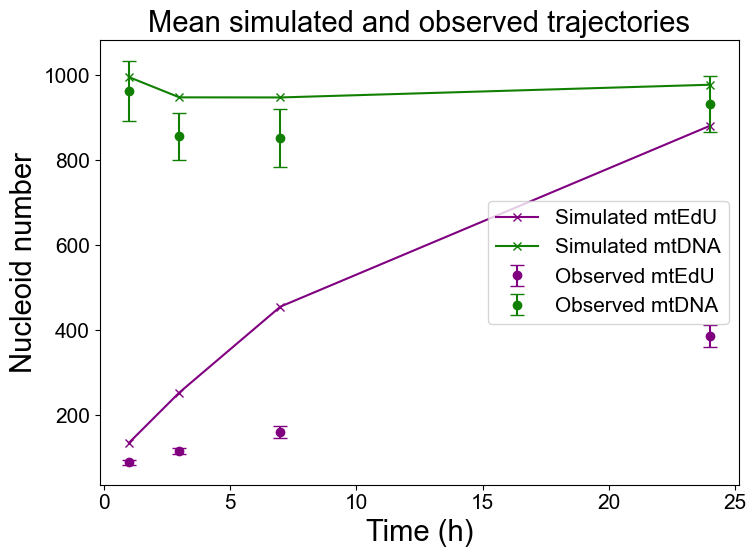

In [7]:
ABC_plot.plot_mean_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

If we instead change nothing but the replication termination rate $\mu_r$, making it smaller, then since molecules take longer to replicate, the proportion of molecules replicating at any given time becomes larger. This population accumulates EdU immediately, leading to an initial accumulation which is too rapid.

Note specifically that the slope of the mtEdU increase does not change much - meaning the turnover rate hasn't changed much. The difference is only that the curve begun from a larger value:

In [8]:
small_rep_term_params = params.copy()

#dividing mu_r by 4
small_rep_term_params[5] = params[5]/4

#and resimulating
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_three_population_pulse(small_rep_term_params, verbose = False, full_trajectory = False, mode = "full")

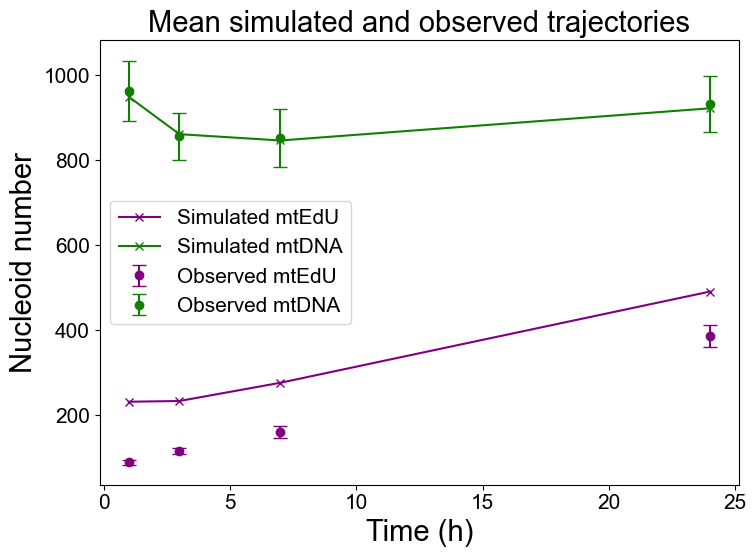

In [9]:
ABC_plot.plot_mean_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

If we instead change $p$, the probability that a recently replicated molecules doesn't start replicating again, we find that the proportion of singly tagged molecules at 24 hours will change. Choosing p=1, for instance, will lead to much less repeated replication, and so a much higher singly tagged proportion, even though the model can be made to fit the data well in every other metric:

In [10]:
singular_p_params = params.copy()

singular_p_params[2] = 1
singular_p_params[4] = params[4]/(2*params[2])
singular_p_params[5] = params[5]/2

#and resimulating
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_three_population_pulse(singular_p_params, verbose = False, full_trajectory = False, mode = "full")

Singly tagged proportion too high:

In [11]:
print(average_peak1_proportion)

0.7613462046981765


Even through the nucleoid trajectories fit:

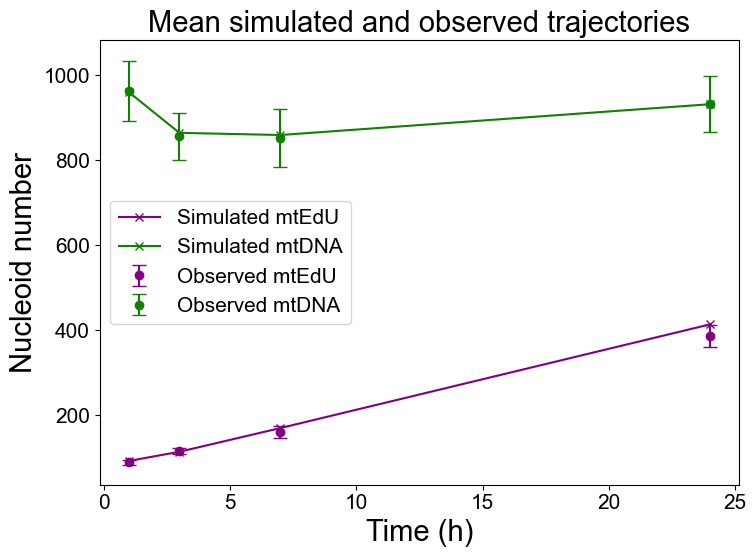

In [12]:
ABC_plot.plot_mean_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

Finally, making the control strength $c$ too large leads to a copy number control that is too tight, which is only observable when observing the stochasticity of the simulation:

In [13]:
CN_control_params = params.copy()

CN_control_params[-1] = params[-1]*100

#and resimulating
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_three_population_pulse(CN_control_params, verbose = False, full_trajectory = False, mode = "full")

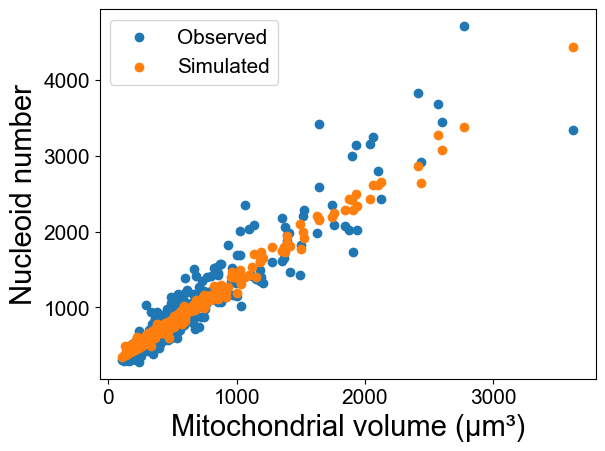

In [14]:
ABC_plot.plot_nucleoid_mito(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

The chase portion of the experiment is also probe-able. Here we only display an output for a parameter sample with high posterior probability. The parameters are ordered:

$\beta_0, \beta_1, \sigma, p, \mu_d, \mu_b, \mu_r, \mu_b^{chase}, p^{chase}, \mu_d^{chase}, \mu_a^{chase}, c$,

where $\sigma$ is as defined in Supplementary Information Section 3.1.2. A parameter $\theta$ from the pulse portion of the experiment changes into the parameter $\theta^{chase}$ for the chase portion of the experiment. If there is no $\theta^{chase}$ argument for a given $\theta$, this parameter stays constant throughout both phases. In our fits, only $\mu_a$ and $\mu_b$ change, so we'll see in the saved parameters in particular that $p = p^{chase}, \mu_d = \mu_d^{chase}$

In [15]:
params_chase = np.load("./data_preprocessing/simulated_ABC_data/three_population_model/three_population_chase_accepted_params.npy")[4]
print(params_chase)
(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase) = ssm.logarithmic_three_population_chase(params_chase, verbose = False, full_trajectory = False, mode = "full")

[3.38154466e+02 1.24206473e+00 1.19272236e-01 2.96021744e-01
 2.54021909e-02 2.42297728e-02 2.79505969e-01 1.48798273e-05
 2.96021744e-01 2.54021909e-02 7.51721249e-05 2.62504378e-02]


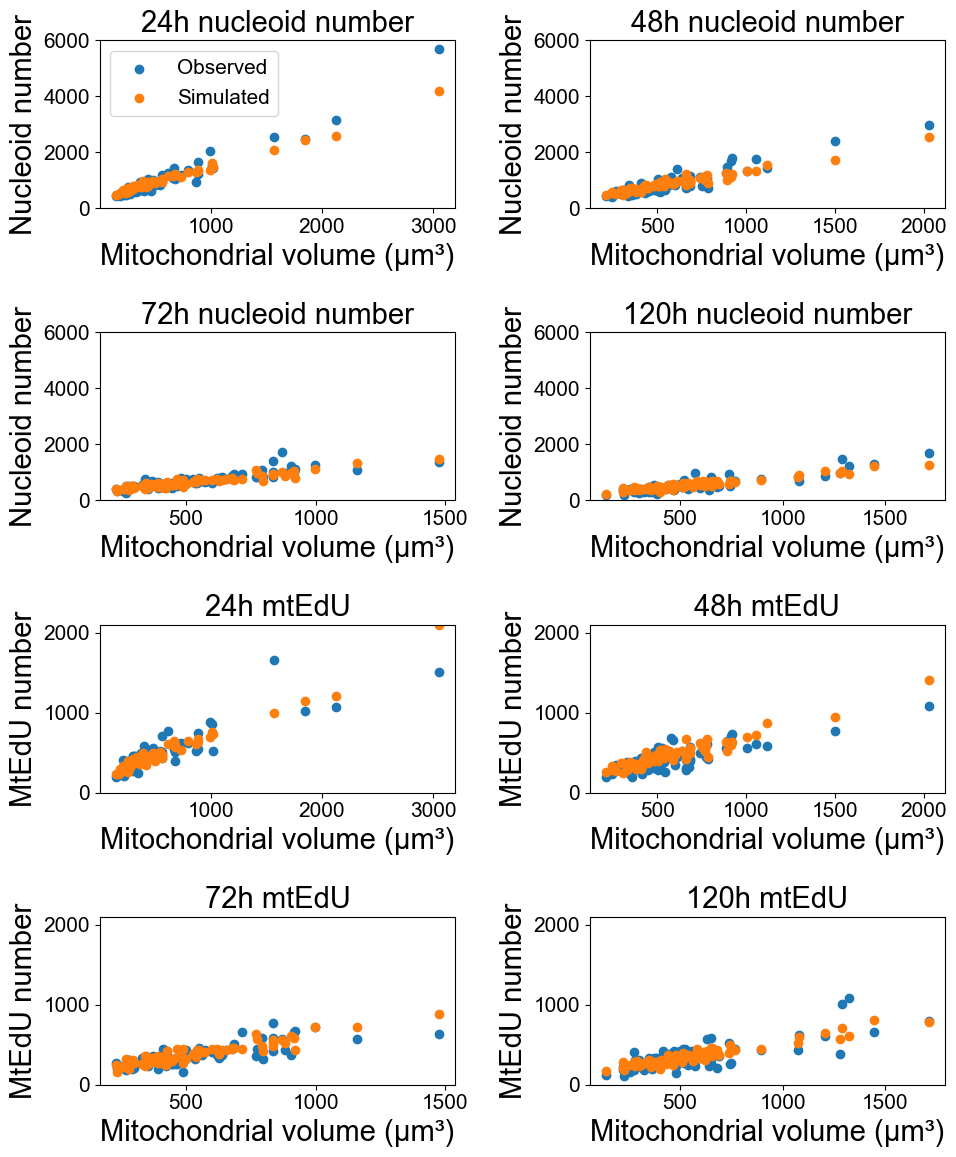

In [16]:
ABC_plot.plot_stochastic_chase_traj(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy)

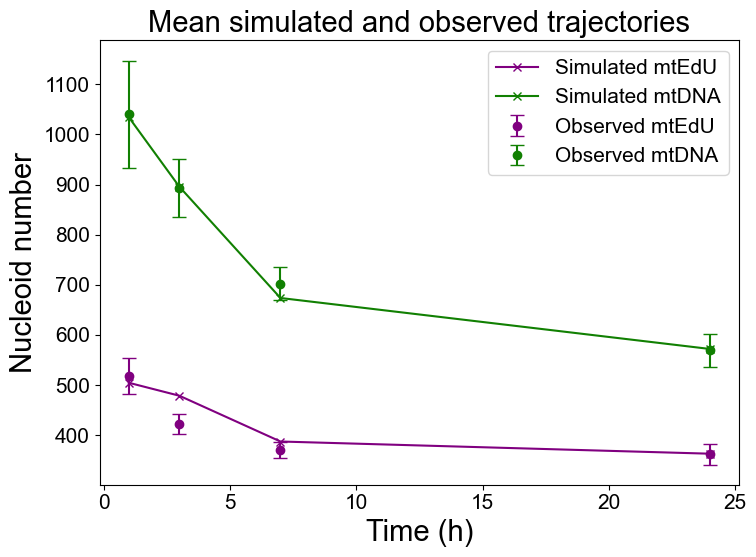

In [18]:
ABC_plot.plot_mean_chase_traj(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy)

We can simulate the two and one population models similarly, for example:

[1.99192653e+02 1.30917690e+00 3.65197297e-02 1.63151265e-02
 1.91275206e-01 1.03796374e-04]


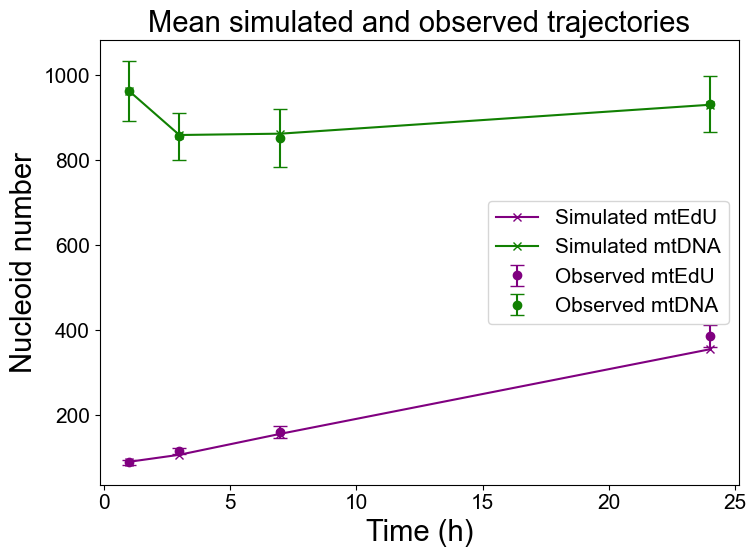

In [19]:
two_pop_params = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/two_population_pulse_accepted_params.npy")[0]
print(two_pop_params)

(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_two_population_pulse(two_pop_params, verbose = False, full_trajectory = False, mode = "full")

ABC_plot.plot_mean_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)

[2.27122235e+02 1.44899340e+00 1.54764578e-01 2.72897944e-01
 1.81731715e-02 2.86983345e-01 0.00000000e+00 2.72897944e-01
 5.37501937e-03 2.88663154e-04]


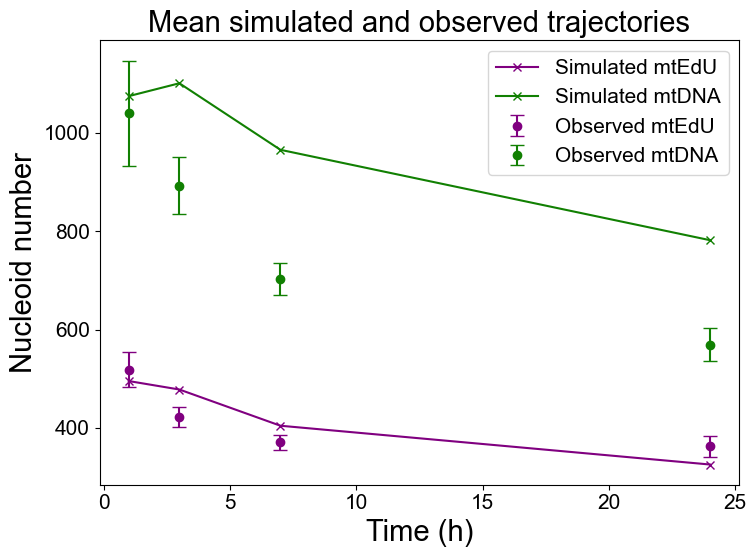

In [20]:
two_pop_params_chase = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/two_population_chase_accepted_params.npy")[0]
print(two_pop_params_chase)

(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase) = ssm.logarithmic_two_population_chase(two_pop_params_chase, verbose = False, full_trajectory = False, mode = "full")

ABC_plot.plot_mean_chase_traj(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy)

[2.26197823e+02 1.24089937e+00 2.33346612e-02 1.18977490e-03]


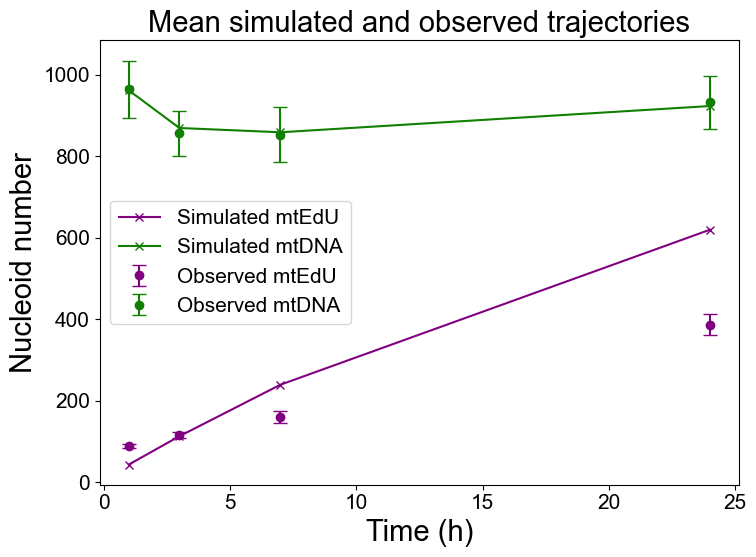

In [21]:
one_pop_params = np.load("./data_preprocessing/simulated_ABC_data/one_population_model/one_population_pulse_accepted_params.npy")[0]
print(one_pop_params)

(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h, e1_h, e3_h, e7_h, e24_h) = ssm.logarithmic_one_population_pulse(one_pop_params, verbose = False, full_trajectory = False, mode = "full")

ABC_plot.plot_mean_pulse_traj(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr)